In [19]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io # Diperlukan untuk membaca data string jika file diakses dari memori
import math # Untuk perhitungan ukuran grid subplot

# Load the dataset
file_path = "/content/Rekrutmen data - recruitment_data.csv"
recruitment_data = pd.read_csv(file_path)

# Show the first few rows and summary
recruitment_data.head(), recruitment_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


(   Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  \
 0   26       1               2                0                  3   
 1   39       1               4               12                  3   
 2   48       0               2                3                  2   
 3   34       1               2                5                  2   
 4   30       0               1                6                  1   
 
    DistanceFromCompany  InterviewScore  SkillScore  PersonalityScore  \
 0            26.783828              48          78                91   
 1            25.862694              35          68                80   
 2             9.920805              20          67                13   
 3             6.407751              36          27                70   
 4            43.105343              23          52                85   
 
    RecruitmentStrategy  HiringDecision  
 0                    1               1  
 1                    2               1  
 2    

In [20]:
recruitment_data.head(4)

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0


In [21]:
recruitment_data.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,3.000000,1.000000


In [22]:
print(f"Jumlah baris duplikat: {recruitment_data.duplicated().sum()}")
print(f"Jumlah baris yang hilang (missing value): {recruitment_data.isnull().any(axis=1).sum()}")


Jumlah baris duplikat: 0
Jumlah baris yang hilang (missing value): 0


**Cek Outlier**

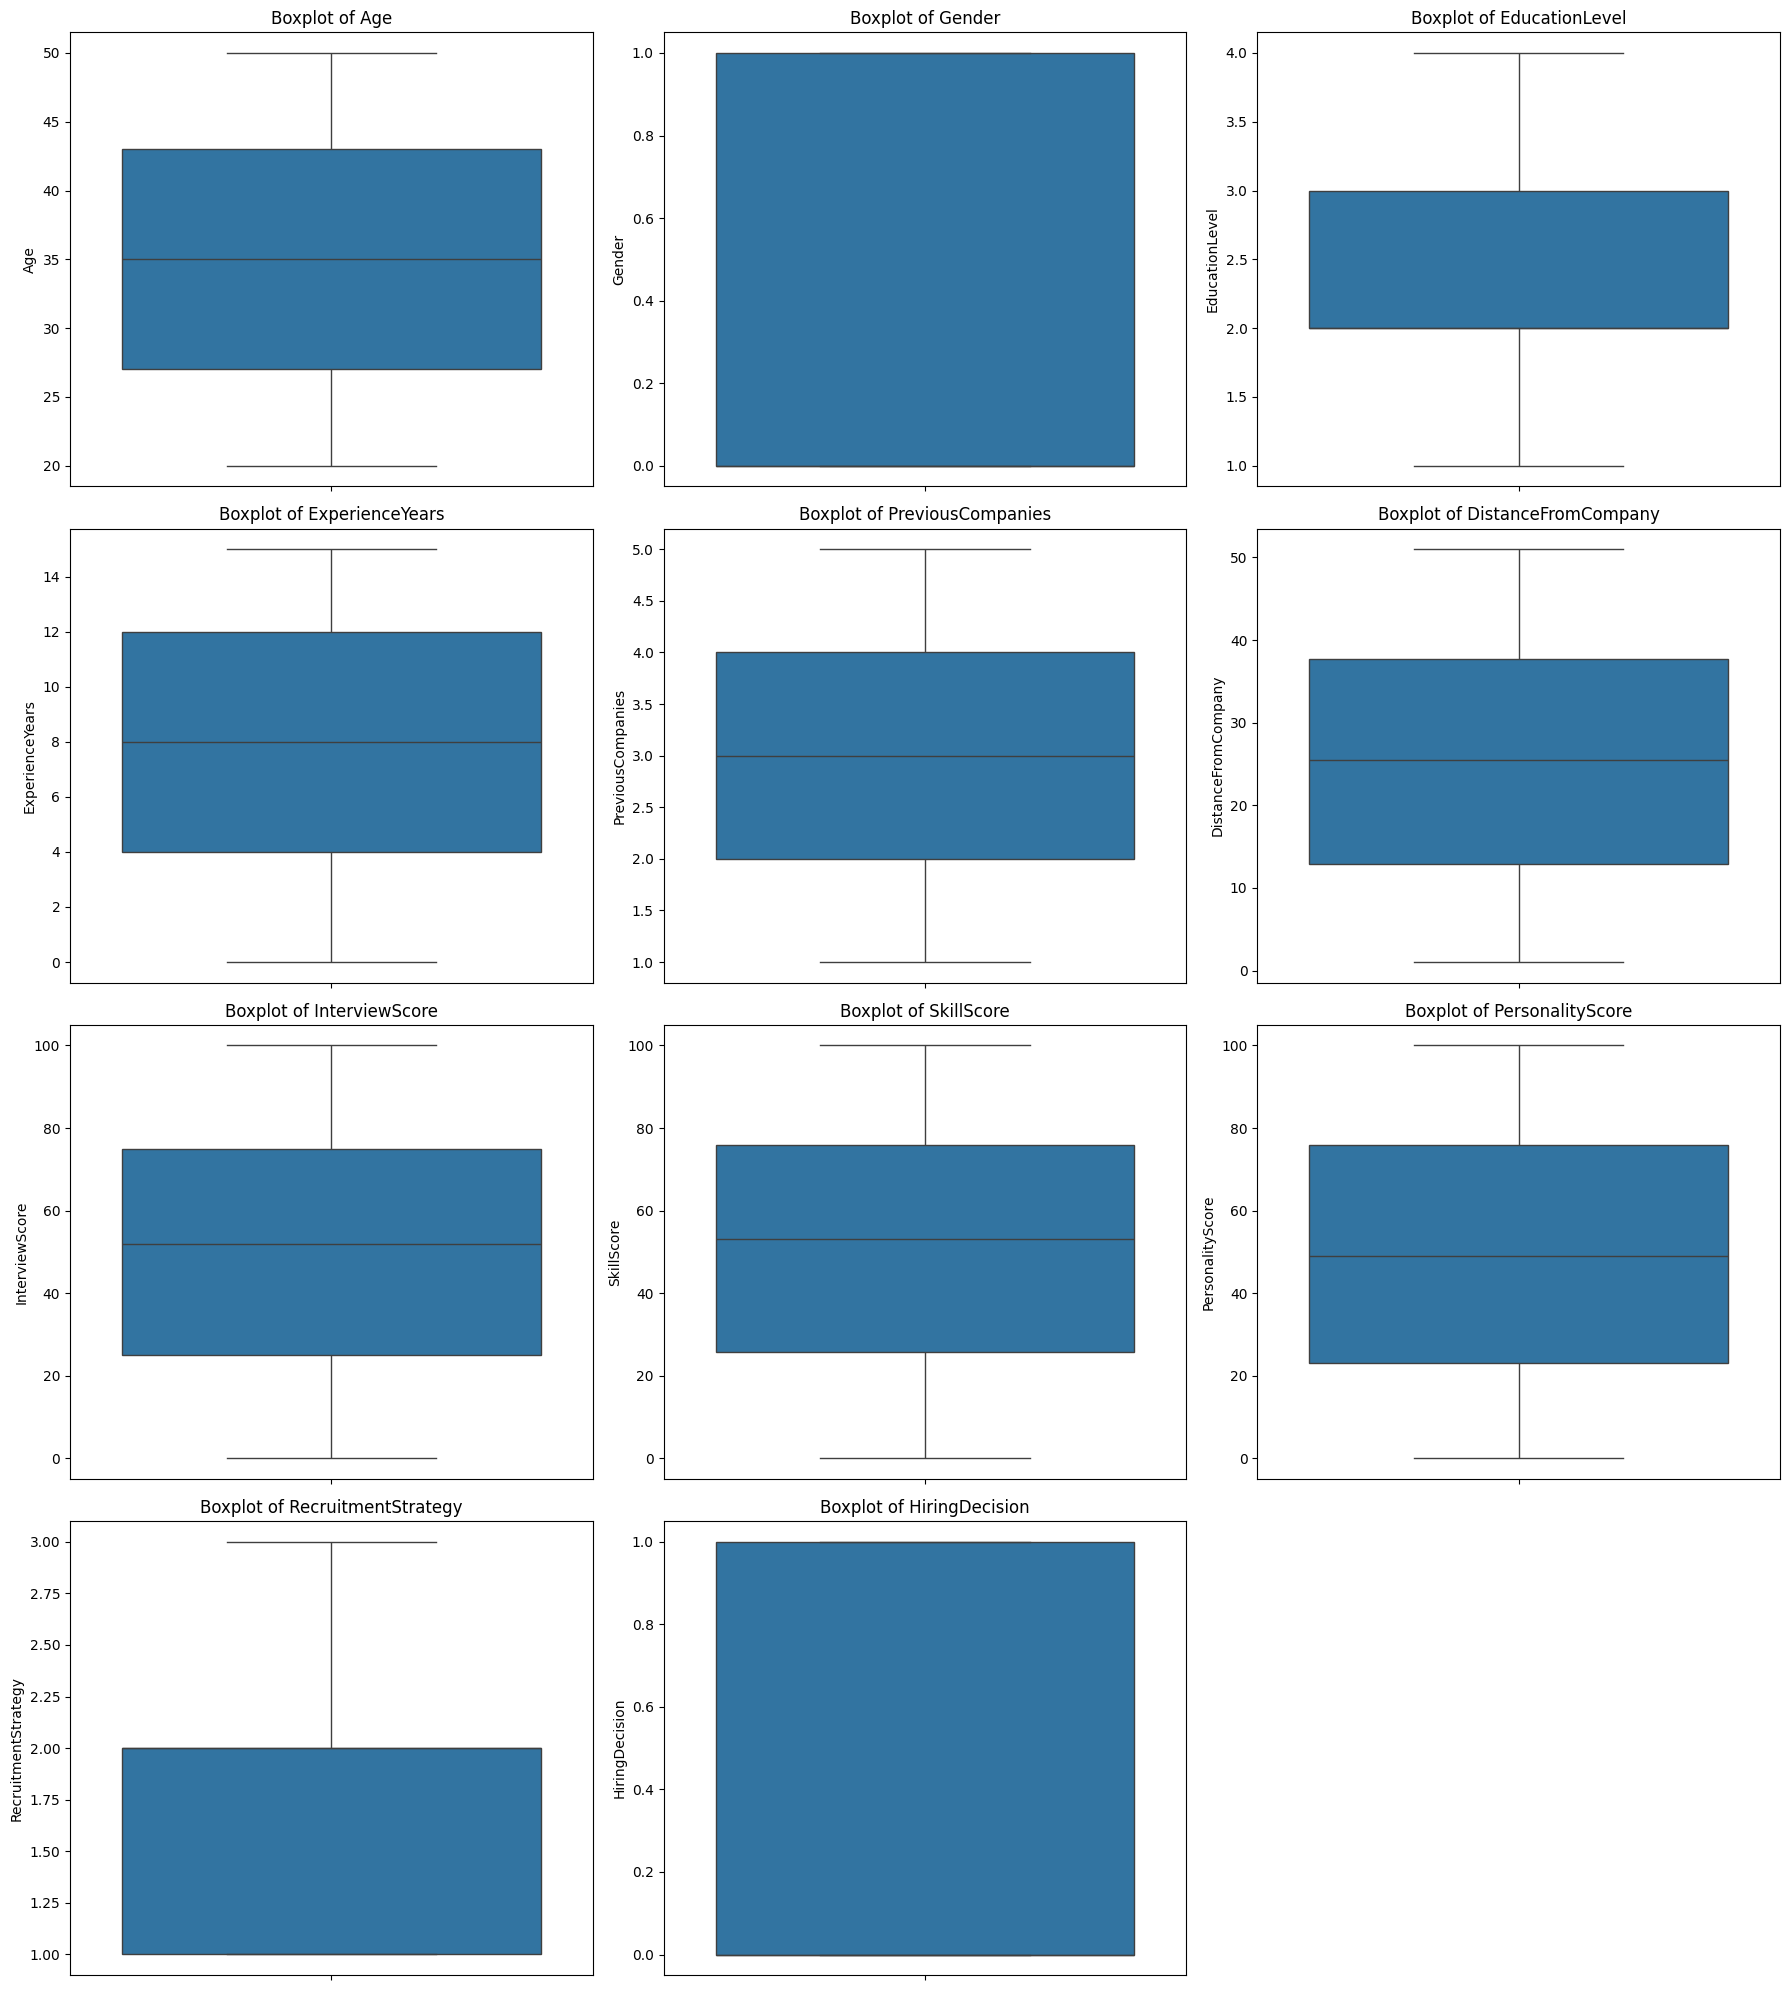

In [23]:
import matplotlib.pyplot as plt
# Determine the number of columns to plot
num_cols = recruitment_data.select_dtypes(include=['number']).columns.tolist()
num_plots = len(num_cols)

# Calculate grid size for subplots
cols_per_row = 3 # You can adjust this number
rows_per_plot = math.ceil(num_plots / cols_per_row)

# Create subplots
fig, axes = plt.subplots(rows_per_plot, cols_per_row, figsize=(cols_per_row * 6, rows_per_plot * 5))
axes = axes.flatten() # Flatten the array of axes for easier iteration

# Create boxplots for each numerical column
for i, col in enumerate(num_cols):
    sns.boxplot(y=recruitment_data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('') # Remove x-axis label for clarity

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Cek Persebaran Data**

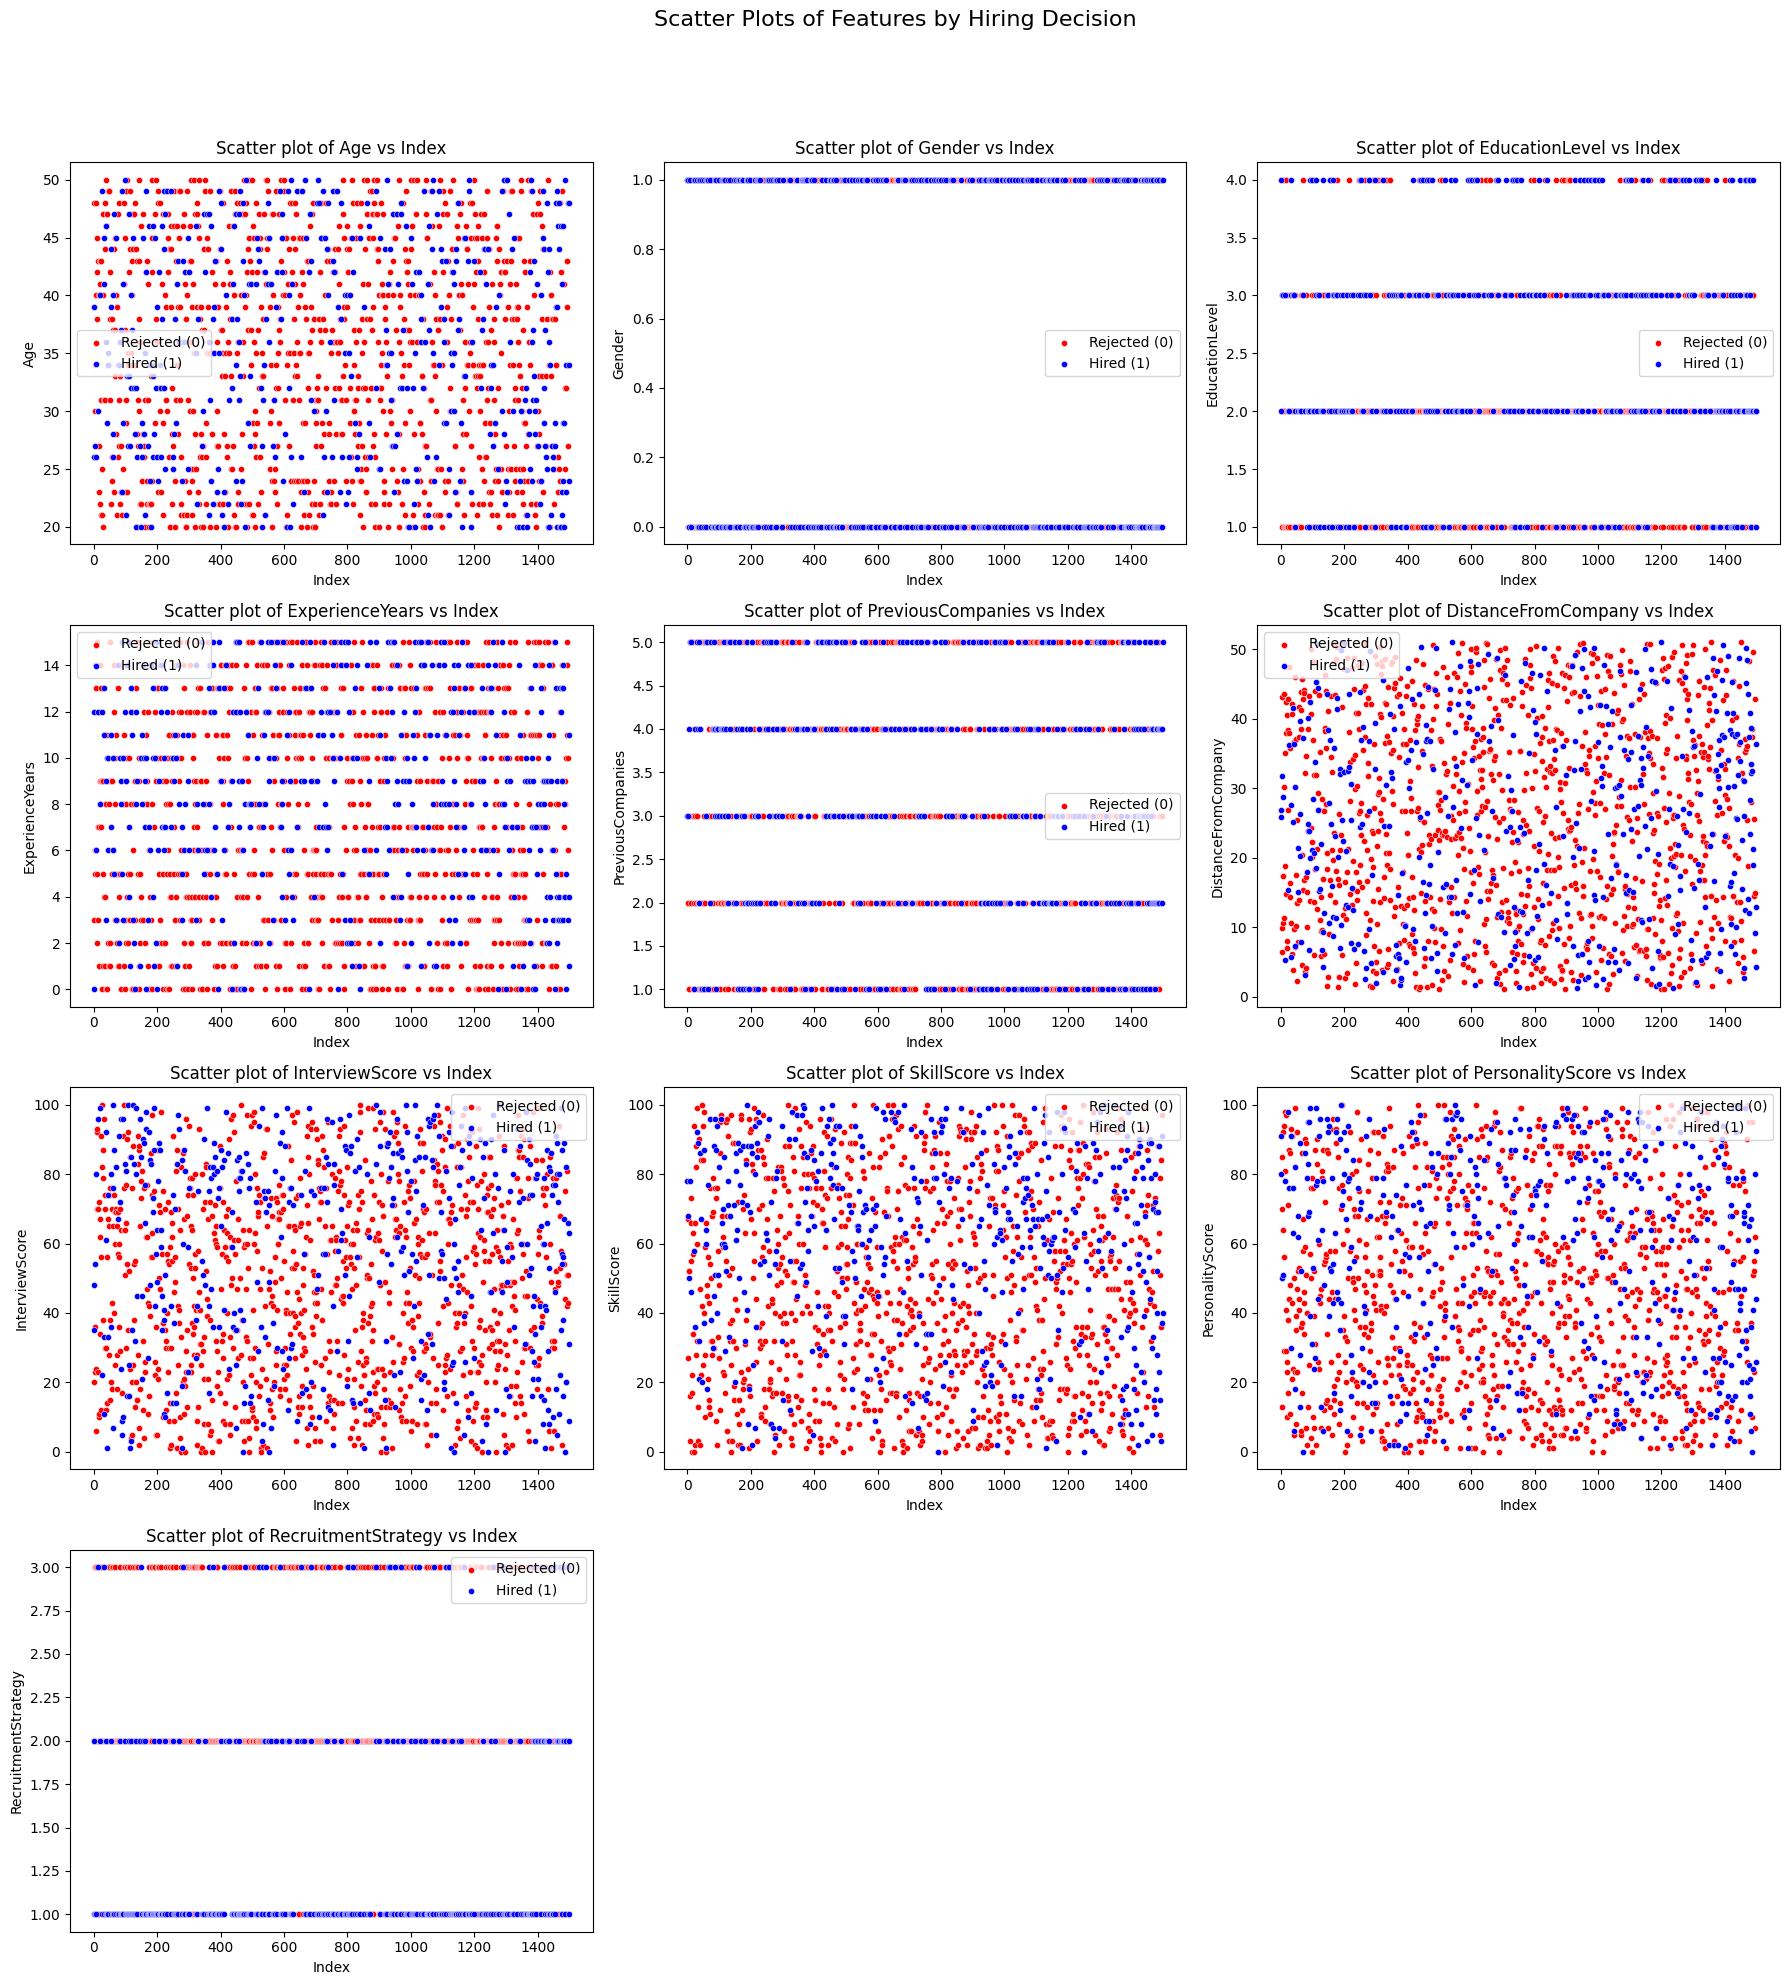

In [24]:
import matplotlib.pyplot as plt
# Identify numerical columns excluding the target variable 'HiringDecision'
numerical_cols_for_scatter = df.select_dtypes(include=['number']).columns.tolist()
if 'HiringDecision' in numerical_cols_for_scatter:
    numerical_cols_for_scatter.remove('HiringDecision')

# Determine the number of columns to plot
num_scatter_plots = len(numerical_cols_for_scatter)

# Calculate grid size for subplots
cols_per_row_scatter = 3 # You can adjust this number
rows_per_plot_scatter = math.ceil(num_scatter_plots / cols_per_row_scatter)

# Create subplots for scatter plots
fig_scatter, axes_scatter = plt.subplots(rows_per_plot_scatter, cols_per_row_scatter,
                                          figsize=(cols_per_row_scatter * 6, rows_per_plot_scatter * 5))
axes_scatter = axes_scatter.flatten() # Flatten the array of axes

# Create scatter plots for each numerical column against its index (or just plotted)
for i, col in enumerate(numerical_cols_for_scatter):
    # Scatter plot for HiringDecision = 0 (Red)
    sns.scatterplot(data=df[df['HiringDecision'] == 0], x=df[df['HiringDecision'] == 0].index, y=col, ax=axes_scatter[i], color='red', label='Rejected (0)', s=20)

    # Scatter plot for HiringDecision = 1 (Blue)
    sns.scatterplot(data=df[df['HiringDecision'] == 1], x=df[df['HiringDecision'] == 1].index, y=col, ax=axes_scatter[i], color='blue', label='Hired (1)', s=20)

    axes_scatter[i].set_title(f'Scatter plot of {col} vs Index', fontsize=12)
    axes_scatter[i].set_xlabel('Index', fontsize=10)
    axes_scatter[i].set_ylabel(col, fontsize=10)
    axes_scatter[i].legend() # Add legend to show color mapping

# Hide any unused subplots
for j in range(i + 1, len(axes_scatter)):
    fig_scatter.delaxes(axes_scatter[j])

# Adjust layout and display plot
plt.suptitle('Scatter Plots of Features by Hiring Decision', y=1.02, fontsize=16) # Main title
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent overlap
plt.show()

**Data Understanding**

In [25]:
# Buat tabel distribusi deskriptif terpisah berdasarkan HiringDecision
distribution_table =df.groupby('HiringDecision')[[
    'Age', 'ExperienceYears', 'InterviewScore', 'SkillScore',
    'PersonalityScore', 'DistanceFromCompany'
]].describe().transpose()
print("Tabel Statistik Deskriptif Hiring Decision (1= diterima, 0=ditolak)")
distribution_table

Tabel Statistik Deskriptif Hiring Decision (1= diterima, 0=ditolak)


HiringDecision                       0           1
Age                 count  1035.000000  465.000000
                    mean     35.137198   35.174194
                    std       9.267177    9.230395
                    min      20.000000   20.000000
                    25%      27.000000   27.000000
                    50%      36.000000   35.000000
                    75%      43.000000   44.000000
                    max      50.000000   50.000000
ExperienceYears     count  1035.000000  465.000000
                    mean      7.313043    8.541935
                    std       4.721302    4.344892
                    min       0.000000    0.000000
                    25%       3.000000    6.000000
                    50%       7.000000    9.000000
                    75%      11.500000   12.000000
                    max      15.000000   15.000000
InterviewScore      count  1035.000000  465.000000
                    mean     47.762319   56.800000
                    std      27.513765   30.065245
                    min       0.000000    0.000000
                    25%      24.000000   31.000000
                    50%      48.000000   62.000000
                    75%      70.000000   83.000000
                    max     100.000000  100.000000
SkillScore          count  1035.000000  465.000000
                    mean     47.110145   60.032258
                    std      29.288227   27.505662
                    min       0.000000    0.000000
                    25%      22.000000   39.000000
                    50%      46.000000   65.000000
                    75%      73.000000   83.000000
                    max     100.000000  100.000000
PersonalityScore    count  1035.000000  465.000000
                    mean     46.059903   56.793548
                    std      28.582168   29.721124
                    min       0.000000    0.000000
                    25%      21.000000   30.000000
                    50%      45.000000   63.000000
                    75%      69.000000   82.000000
                    max     100.000000  100.000000
DistanceFromCompany count  1035.000000  465.000000
                    mean     25.669273   25.140583
                    std      14.649616   14.390860
                    min       1.031376    1.197997
                    25%      13.090216   12.150491
                    50%      25.620088   25.405877
                    75%      38.301204   37.120569
                    max      50.973395   50.992462

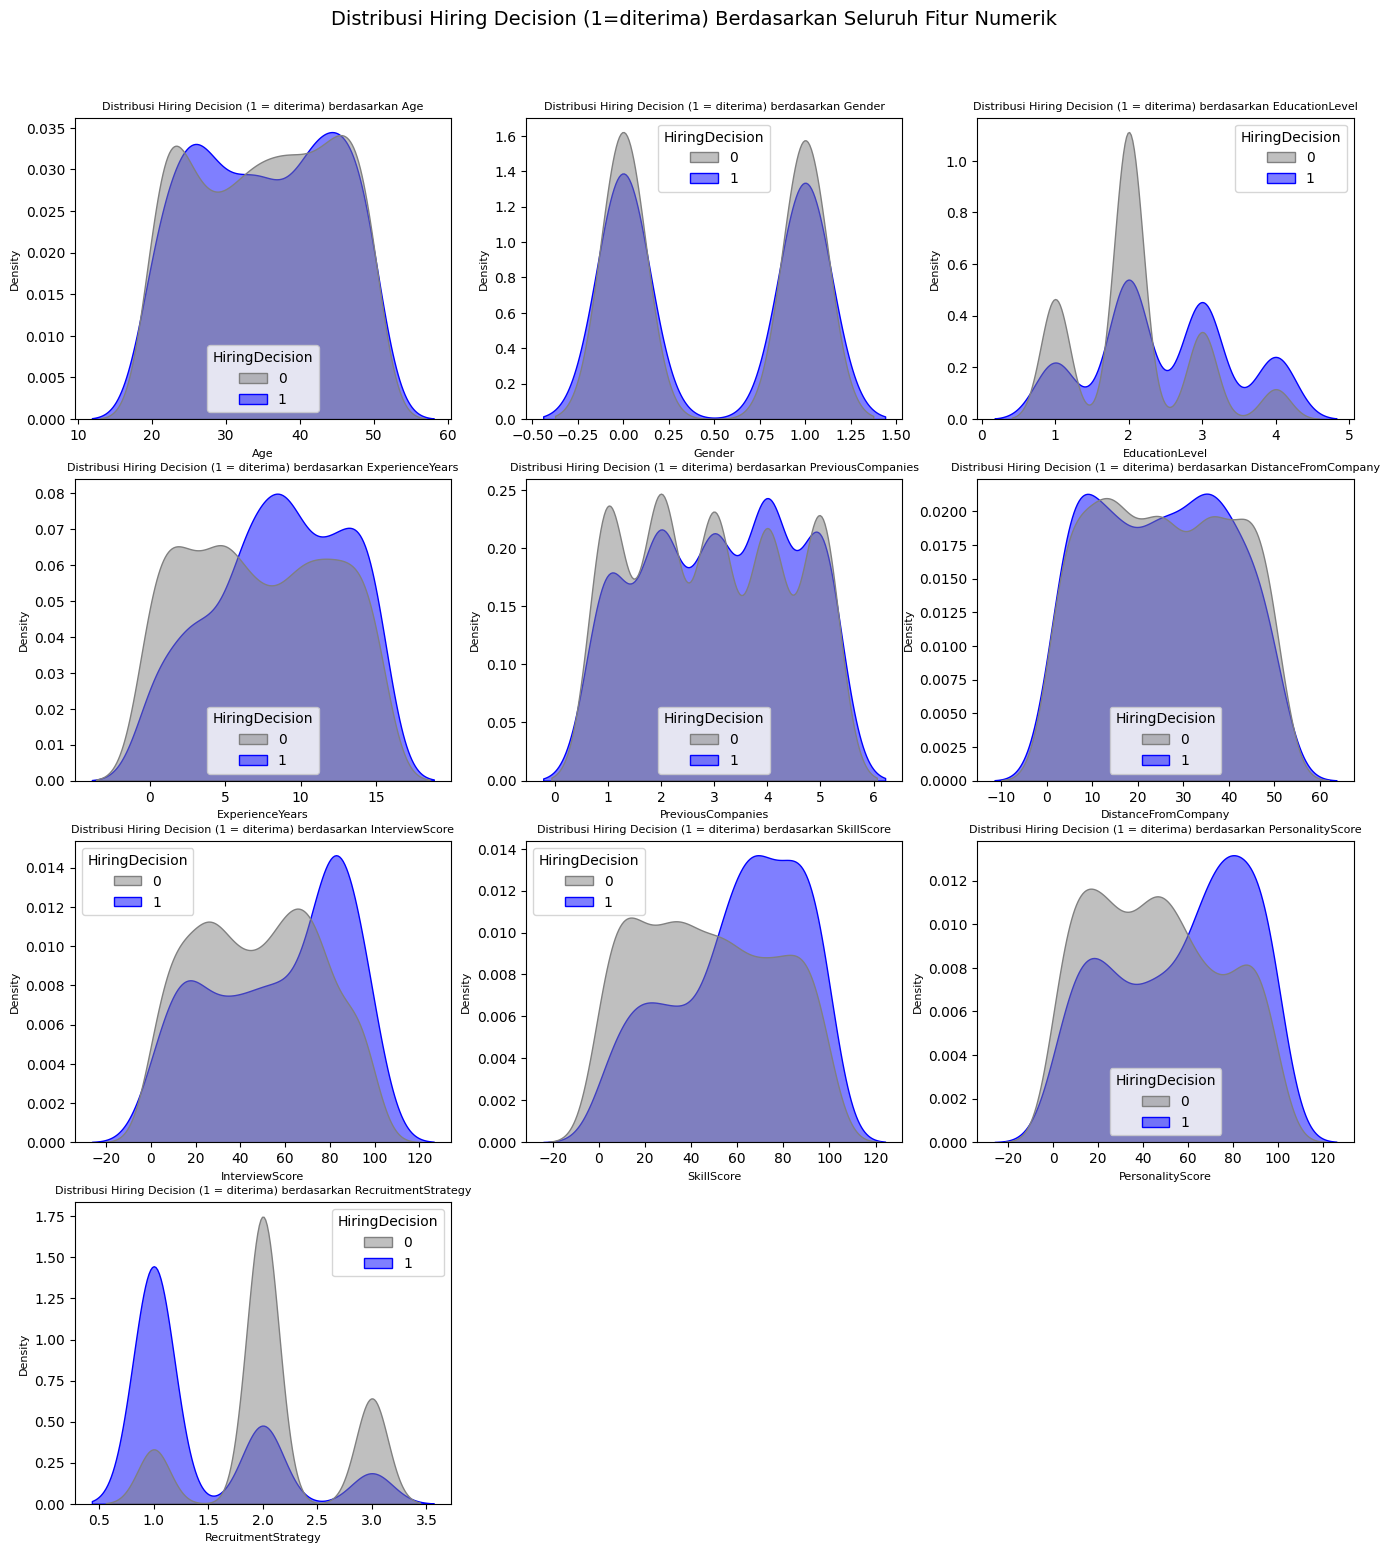

In [26]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
if 'HiringDecision' in numerical_cols: # Pastikan 'HiringDecision' tidak di-plot sebagai fitur numerik
    numerical_cols.remove('HiringDecision')

if not numerical_cols:
    print("Tidak ada kolom numerik yang ditemukan untuk di-plot distribusinya.")
else:
    # Langkah 3: Menentukan ukuran grid untuk subplot secara dinamis
    num_plots = len(numerical_cols)
    num_cols = 3  # Anda bisa mengubah ini untuk mengatur berapa banyak plot per baris
    num_rows = math.ceil(num_plots / num_cols)

    # Membuat figure dan axes untuk semua subplot
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5.5, num_rows * 4.5))
    axes = axes.flatten() # Meratakan array axes agar lebih mudah diiterasi dalam loop

    # Variabel untuk menyimpan handle dan label legend dari plot pertama
    # Ini akan digunakan untuk membuat satu legend global
    handles, labels = None, None

    custom_palette = {1: 'blue', 0: 'grey'}

    # Langkah 4: Loop melalui setiap kolom numerik dan buat plot KDE
    for i, col in enumerate(numerical_cols):
        if i < len(axes): # Memastikan kita tidak melebihi jumlah subplot yang tersedia
            sns.kdeplot(data=df, x=col, hue='HiringDecision', fill=True,
                        common_norm=False, alpha=0.5, ax=axes[i],palette=custom_palette)
            axes[i].set_title(f'Distribusi Hiring Decision (1 = diterima) berdasarkan {col}', fontsize=8)
            axes[i].set_xlabel(col, fontsize=8)
            axes[i].set_ylabel('Density', fontsize=8)
         # --- BAGIAN PENTING: Mengambil handles dan Menentukan Label Legend Kustom ---
            # Mengambil handles dan label default dari plot yang baru dibuat
            handles, default_labels = axes[i].get_legend_handles_labels()


    # Langkah 5: Hapus subplot yang kosong jika ada (jika jumlah plot tidak pas dengan grid)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Langkah 6: Tambahkan Legend Tunggal untuk Seluruh Gambar (Figure)
    if handles and labels:
        fig.legend(handles=handles, labels=labels, title='HiringDecision',
                   loc='upper right', bbox_to_anchor=(1.08, 1), # Menempatkan legend di luar area plot utama
                   fontsize=9, title_fontsize=10)

    # Langkah 7: Beri Judul Keseluruhan dan Simpan Plot
    plt.suptitle('Distribusi Hiring Decision (1=diterima) Berdasarkan Seluruh Fitur Numerik', y=0.94, fontsize=14)

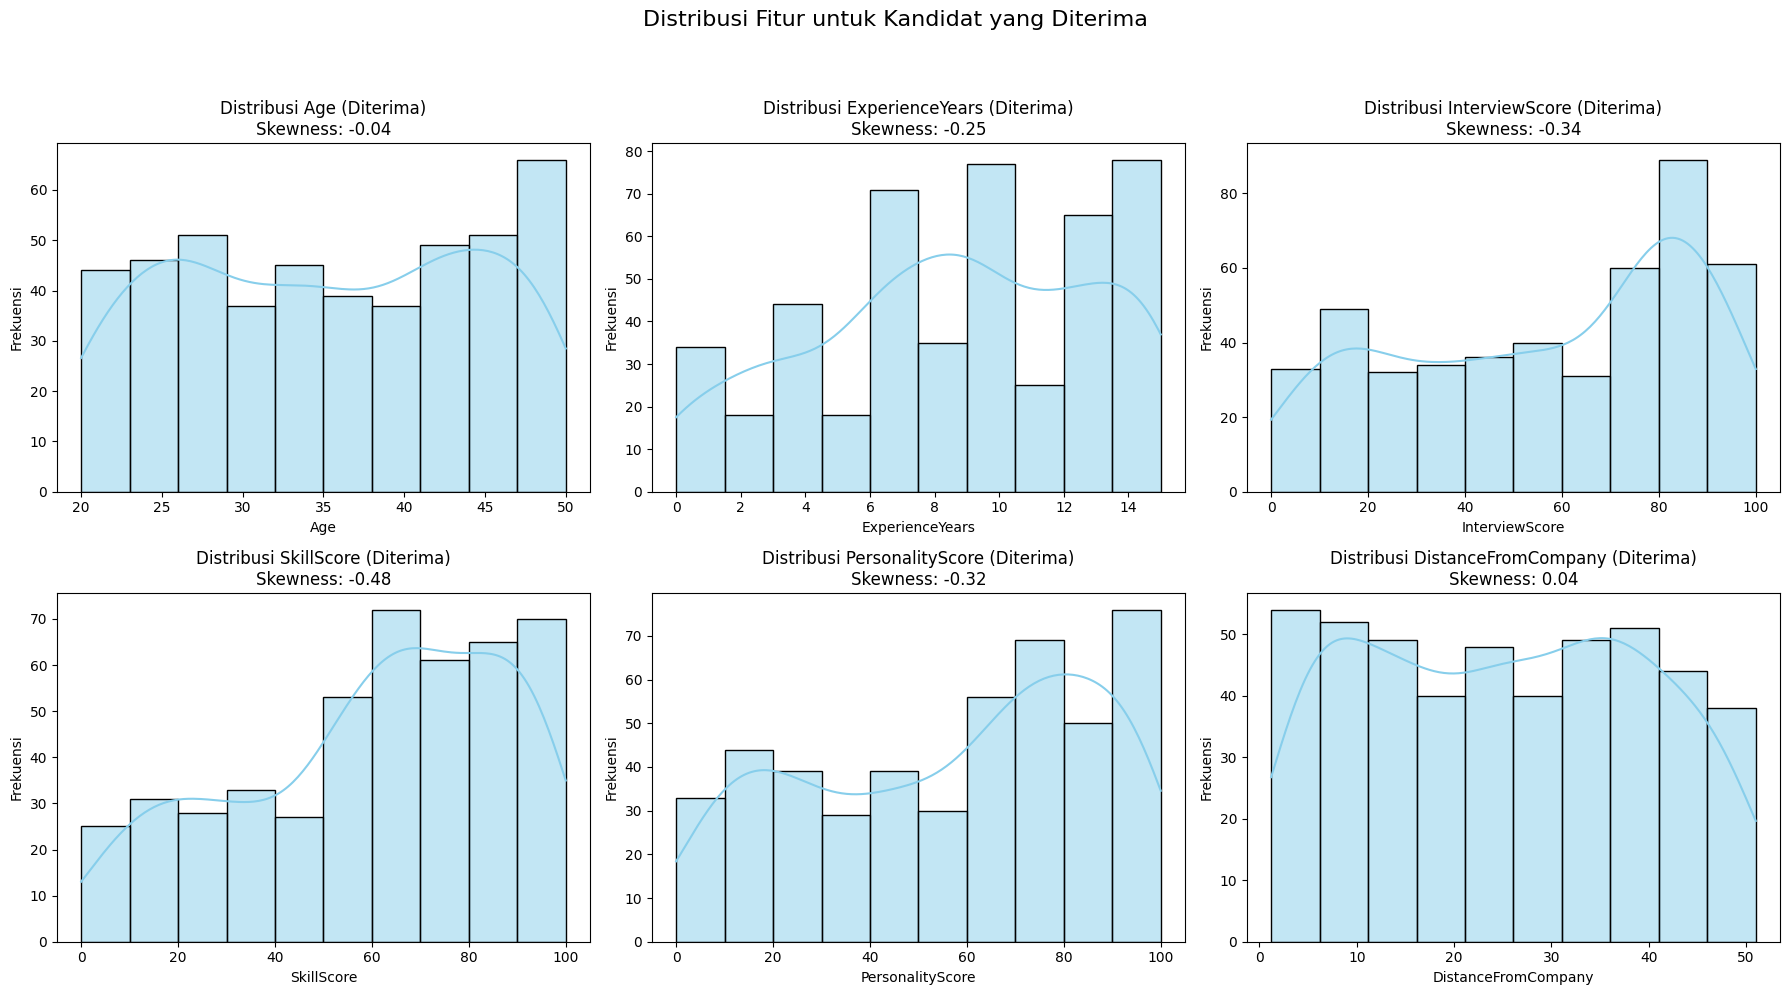

In [27]:
#Hiring decision = 1

import matplotlib.pyplot as plt
# Filter the dataframe for hiring decision = 1
df_hired = df[df['HiringDecision'] == 1]

# Select only the numerical columns from the filtered dataframe
numerical_cols_hired = df_hired.select_dtypes(include=['number']).columns.tolist()

# Remove 'hiring_decision' from the list of columns to plot as it is the filter
if 'HiringDecision' in numerical_cols_hired:
    numerical_cols_hired.remove('HiringDecision')

## --- Langkah 3: Definisikan Kolom yang Diinginkan ---
# Daftar kolom spesifik yang Anda minta untuk di-plot
selected_columns_for_skewness_plot = [
    'Age', 'ExperienceYears', 'InterviewScore', 'SkillScore',
    'PersonalityScore', 'DistanceFromCompany','gender','education'
]

# Filter daftar kolom yang dipilih agar hanya menyertakan yang benar-benar ada di df_hired
# dan yang merupakan tipe numerik.
actual_numerical_cols_to_plot = [
    col for col in selected_columns_for_skewness_plot
    if col in df_hired.columns and pd.api.types.is_numeric_dtype(df_hired[col])
]

if not actual_numerical_cols_to_plot:
    print("Tidak ada kolom numerik yang valid dari daftar yang Anda berikan untuk di-plot dalam data yang diterima.")
else:
    # Langkah 4: Tentukan ukuran grid untuk subplot
    num_plots_hired = len(actual_numerical_cols_to_plot)
    cols_per_row_hired = 3  # Anda bisa menyesuaikan jumlah plot per baris
    rows_per_plot_hired = math.ceil(num_plots_hired / cols_per_row_hired)

    # Langkah 5: Buat subplots untuk distribusi
    fig_dist, axes_dist = plt.subplots(rows_per_plot_hired, cols_per_row_hired,
                                        figsize=(cols_per_row_hired * 6, rows_per_plot_hired * 5))
    axes_dist = axes_dist.flatten()  # Meratakan array axes untuk iterasi yang lebih mudah

    # Langkah 6: Buat plot distribusi untuk setiap kolom yang dipilih
    for i, col in enumerate(actual_numerical_cols_to_plot):
        sns.histplot(data=df_hired, x=col, kde=True, ax=axes_dist[i], color='skyblue') # Warna default untuk plot
        # Hitung skewness
        skewness_val = df_hired[col].skew()
        axes_dist[i].set_title(f'Distribusi {col} (Diterima)\nSkewness: {skewness_val:.2f}', fontsize=12)
        axes_dist[i].set_xlabel(col, fontsize=10)
        axes_dist[i].set_ylabel('Frekuensi', fontsize=10)

    # Langkah 7: Sembunyikan subplot yang tidak digunakan
    for j in range(i + 1, len(axes_dist)):
        fig_dist.delaxes(axes_dist[j])

    # Langkah 8: Sesuaikan tata letak dan tampilkan/simpan plot
    plt.suptitle('Distribusi Fitur untuk Kandidat yang Diterima', y=1.02, fontsize=16) # Judul utama
    plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Menyesuaikan tata letak agar tidak tumpang tindih

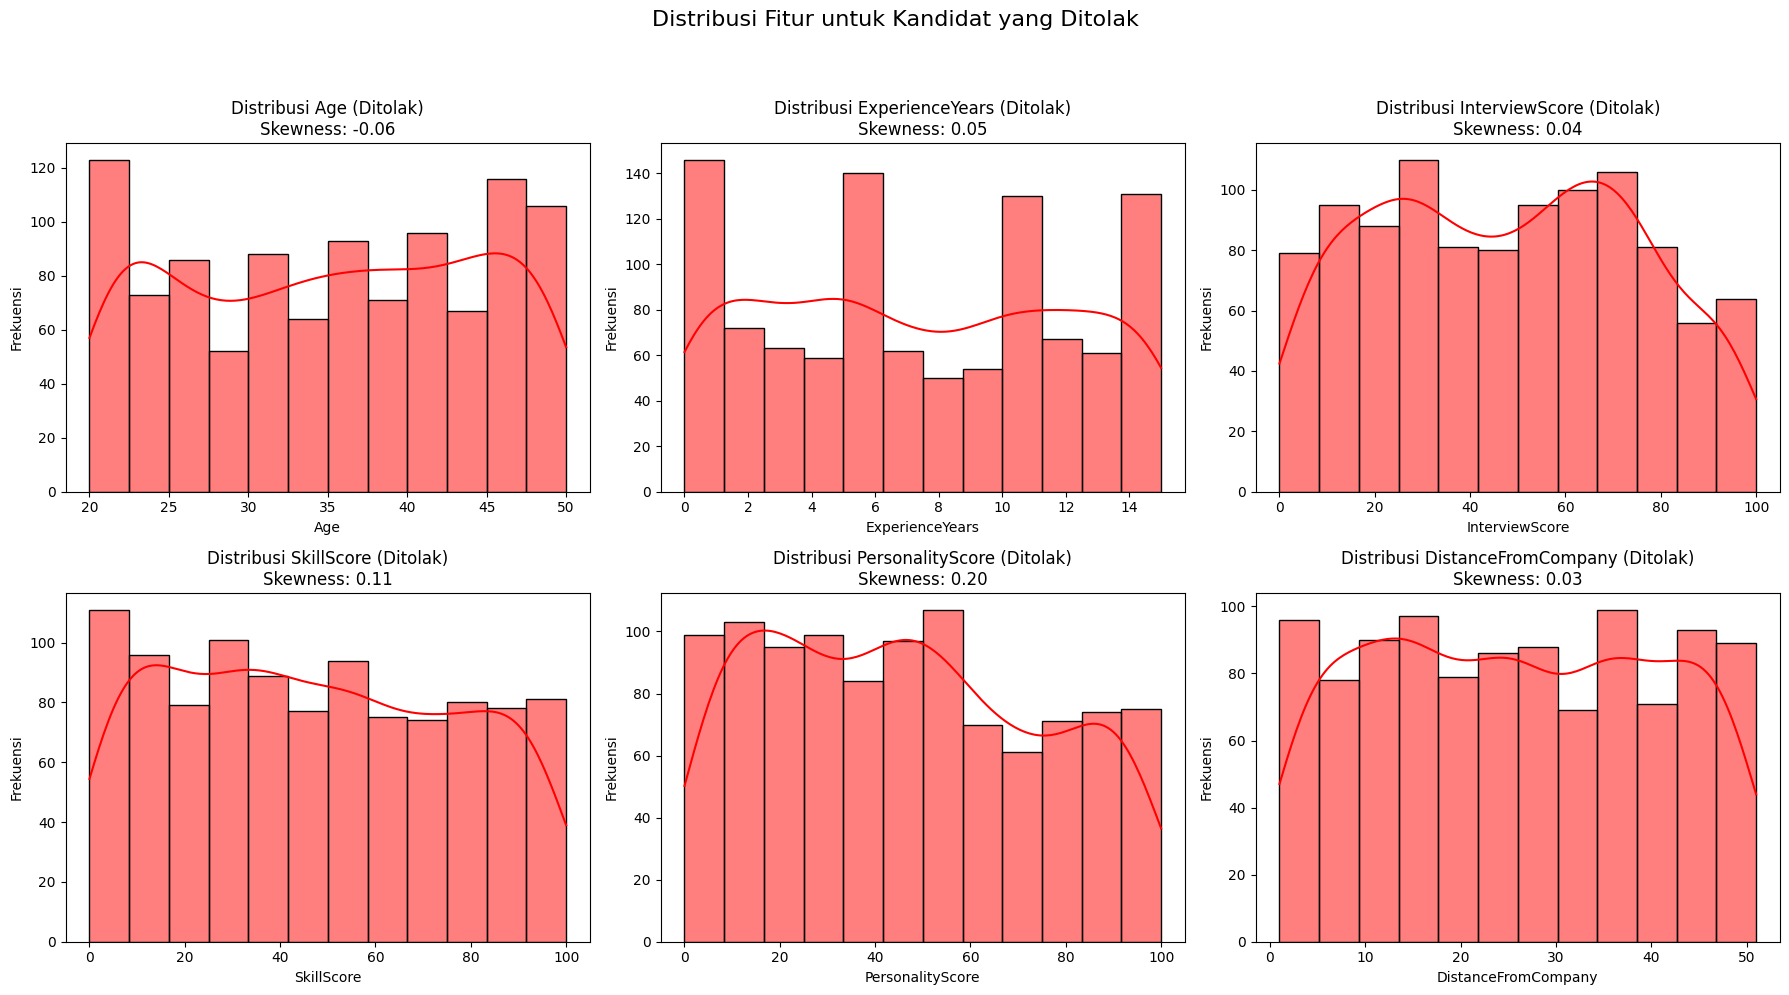

In [28]:
#Hiring decision = 0

import matplotlib.pyplot as plt
# Filter the dataframe for hiring decision = 1
df_hired = df[df['HiringDecision'] == 0]

# Select only the numerical columns from the filtered dataframe
numerical_cols_hired = df_hired.select_dtypes(include=['number']).columns.tolist()

# Remove 'hiring_decision' from the list of columns to plot as it is the filter
if 'HiringDecision' in numerical_cols_hired:
    numerical_cols_hired.remove('HiringDecision')

## --- Langkah 3: Definisikan Kolom yang Diinginkan ---
# Daftar kolom spesifik yang Anda minta untuk di-plot
selected_columns_for_skewness_plot = [
    'Age', 'ExperienceYears', 'InterviewScore', 'SkillScore',
    'PersonalityScore', 'DistanceFromCompany','gender','education'
]

# Filter daftar kolom yang dipilih agar hanya menyertakan yang benar-benar ada di df_hired
# dan yang merupakan tipe numerik.
actual_numerical_cols_to_plot = [
    col for col in selected_columns_for_skewness_plot
    if col in df_hired.columns and pd.api.types.is_numeric_dtype(df_hired[col])
]

if not actual_numerical_cols_to_plot:
    print("Tidak ada kolom numerik yang valid dari daftar yang Anda berikan untuk di-plot dalam data yang diterima.")
else:
    # Langkah 4: Tentukan ukuran grid untuk subplot
    num_plots_hired = len(actual_numerical_cols_to_plot)
    cols_per_row_hired = 3  # Anda bisa menyesuaikan jumlah plot per baris
    rows_per_plot_hired = math.ceil(num_plots_hired / cols_per_row_hired)

    # Langkah 5: Buat subplots untuk distribusi
    fig_dist, axes_dist = plt.subplots(rows_per_plot_hired, cols_per_row_hired,
                                        figsize=(cols_per_row_hired * 6, rows_per_plot_hired * 5))
    axes_dist = axes_dist.flatten()  # Meratakan array axes untuk iterasi yang lebih mudah

    # Langkah 6: Buat plot distribusi untuk setiap kolom yang dipilih
    for i, col in enumerate(actual_numerical_cols_to_plot):
        sns.histplot(data=df_hired, x=col, kde=True, ax=axes_dist[i], color='red') # Warna default untuk plot
        # Hitung skewness
        skewness_val = df_hired[col].skew()
        axes_dist[i].set_title(f'Distribusi {col} (Ditolak)\nSkewness: {skewness_val:.2f}', fontsize=12)
        axes_dist[i].set_xlabel(col, fontsize=10)
        axes_dist[i].set_ylabel('Frekuensi', fontsize=10)

    # Langkah 7: Sembunyikan subplot yang tidak digunakan
    for j in range(i + 1, len(axes_dist)):
        fig_dist.delaxes(axes_dist[j])

    # Langkah 8: Sesuaikan tata letak dan tampilkan/simpan plot
    plt.suptitle('Distribusi Fitur untuk Kandidat yang Ditolak', y=1.02, fontsize=16) # Judul utama
    plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Menyesuaikan tata letak agar tidak tumpang tindih

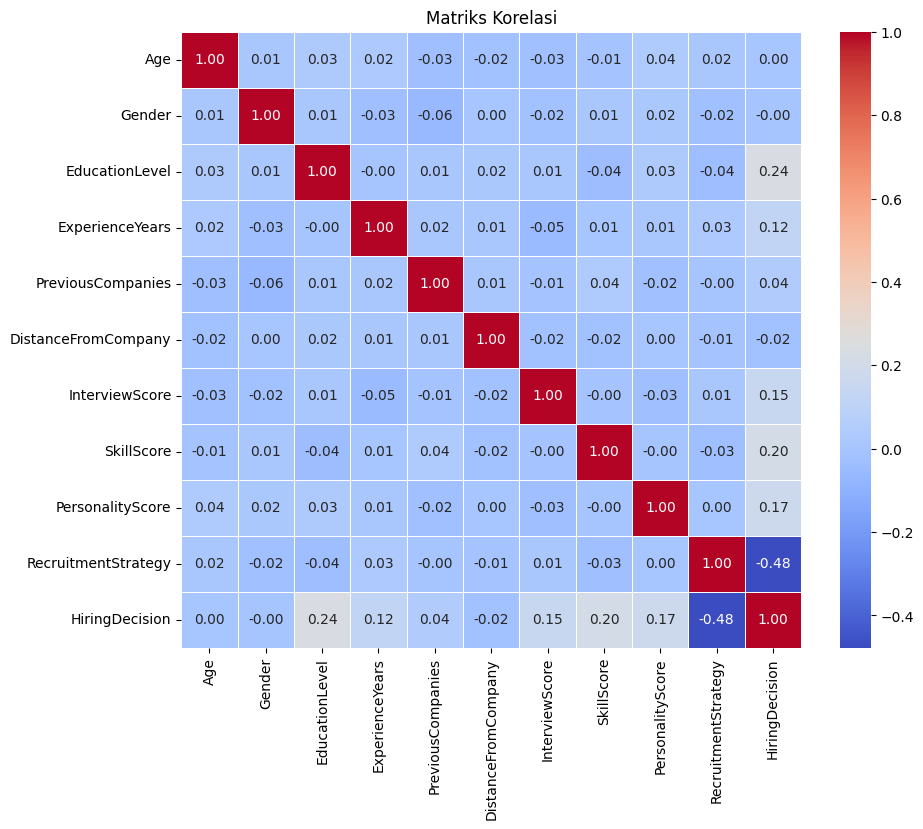

In [29]:
# Matriks korelasi antar fitur
correlation_matrix = recruitment_data.corr()
# Visualisasi korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()


RecruitmentStrategy memiliki korelasi negatif dengan HiringDecision, menunjukkan bahwa strategi perekrutan tertentu mungkin lebih sering menghasilkan
penerimaan atau penolakan daripada yang lain. Ini bisa menunjukkan bahwa metode perekrutan berperan besar dalam proses seleksi.

In [30]:
from sklearn.preprocessing import StandardScaler

# Standarisasi kolom numerik
scaler = StandardScaler()
columns_to_scale = ['Age', 'ExperienceYears', 'InterviewScore', 'SkillScore', 'PersonalityScore', 'DistanceFromCompany']
recruitment_data[columns_to_scale] = scaler.fit_transform(recruitment_data[columns_to_scale])


In [31]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi fitur dan target
X = recruitment_data.drop('HiringDecision', axis=1)
y = recruitment_data['HiringDecision']

# Select key features and target based on IPA
selected_features = [
    "RecruitmentStrategy",
    "SkillScore",
    "ExperienceYears",
    "EducationLevel",
       "SkillScore",
    "InterviewScore",
       "PersonalityScore",
  ]
target = "HiringDecision"
recruitment_data_selected = recruitment_data[selected_features + [target]]

# Split into features and labels
X =  recruitment_data[selected_features]
y = recruitment_data_selected[target]


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 1. Split into train and test first #Cross-vlad
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Apply SMOTE on training set only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 3. Scale features AFTER SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)




In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Inisialisasi model baseline
baseline_model = LogisticRegression()
baseline_model.fit(X_train_scaled, y_train_smote)

# Prediksi
y_pred = baseline_model.predict(X_test_scaled)

# Evaluasi
print("=== Baseline Model (Logistic Regression) ===")
print(classification_report(y_test, y_pred))

=== Baseline Model (Logistic Regression) ===
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       207
           1       0.67      0.80      0.73        93

    accuracy                           0.82       300
   macro avg       0.79      0.81      0.80       300
weighted avg       0.83      0.82      0.82       300



In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Inisialisasi model
models = {
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC()
}

# Simpan hasil evaluasi
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train_smote)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

# Tampilkan hasil dalam bentuk DataFrame
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='F1 Score', ascending=False))

           Model  Accuracy  Precision    Recall  F1 Score
3  Random Forest  0.923333   0.926829  0.817204  0.868571
0            KNN  0.900000   0.824742  0.860215  0.842105
4            SVM  0.886667   0.792079  0.860215  0.824742
2  Decision Tree  0.880000   0.782178  0.849462  0.814433
1    Naive Bayes  0.833333   0.686957  0.849462  0.759615


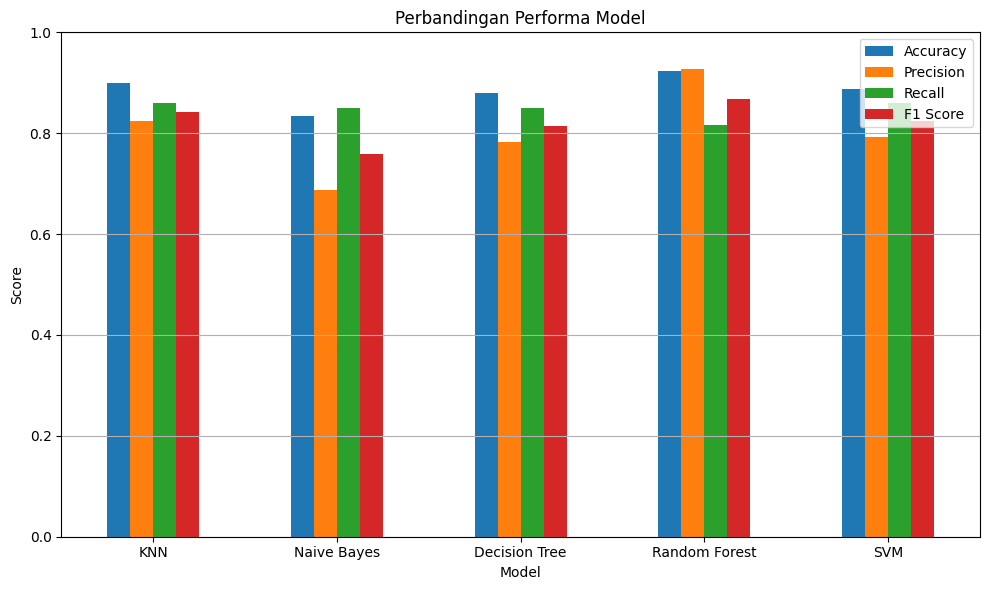

In [34]:
import matplotlib.pyplot as plt

results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(
    kind='bar', figsize=(10,6), ylim=(0,1), title='Perbandingan Performa Model')
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


=== KNN ===
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       207
           1       0.47      0.46      0.47        93

    accuracy                           0.67       300
   macro avg       0.62      0.62      0.62       300
weighted avg       0.67      0.67      0.67       300



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


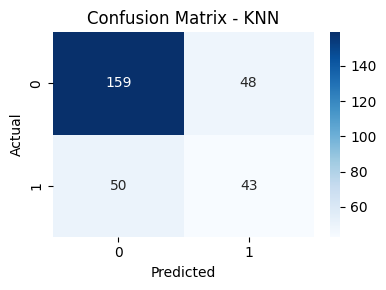

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(



=== Naive Bayes ===
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       207
           1       0.75      0.69      0.72        93

    accuracy                           0.83       300
   macro avg       0.81      0.79      0.80       300
weighted avg       0.83      0.83      0.83       300



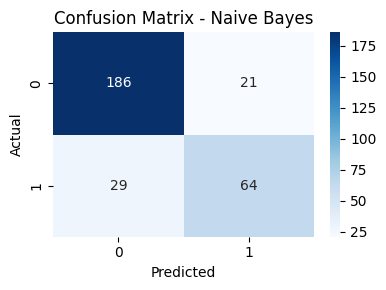

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(



=== Decision Tree ===
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       207
           1       0.49      0.44      0.47        93

    accuracy                           0.69       300
   macro avg       0.63      0.62      0.62       300
weighted avg       0.68      0.69      0.68       300



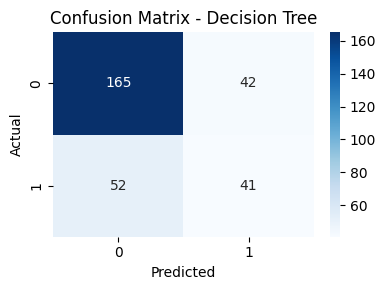

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



=== Random Forest ===
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       207
           1       0.56      0.42      0.48        93

    accuracy                           0.72       300
   macro avg       0.66      0.63      0.64       300
weighted avg       0.70      0.72      0.70       300



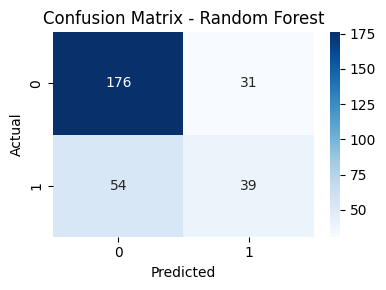

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(



=== SVM ===
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       207
           1       0.41      0.48      0.45        93

    accuracy                           0.63       300
   macro avg       0.58      0.59      0.58       300
weighted avg       0.64      0.63      0.63       300



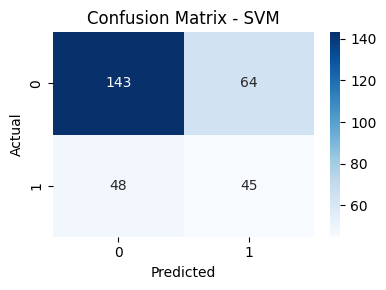

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

for name, model in models.items():
    y_pred = model.predict(X_test)

    print(f"\n=== {name} ===")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

In [36]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, f1_score
import numpy as np

# Inisialisasi K-Fold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1 = make_scorer(f1_score)

# Daftar model
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Menyimpan hasil F1 score
f1_results = {}

# Loop semua model
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring=f1)
    f1_results[name] = {
        "mean_f1": np.mean(scores),
        "f1_per_fold": scores
    }
    print(f"{name}:")
    print("F1 Score per Fold:", scores)
    print("Average F1 Score:", np.mean(scores))
    print("-" * 40)


Logistic Regression:
F1 Score per Fold: [0.79104478 0.71724138 0.69064748 0.72727273 0.7972028 ]
Average F1 Score: 0.7446818323839322
----------------------------------------
KNN:
F1 Score per Fold: [0.78571429 0.71641791 0.75757576 0.78518519 0.78787879]
Average F1 Score: 0.7665543853603556
----------------------------------------
SVM:
F1 Score per Fold: [0.703125   0.80272109 0.77372263 0.80851064 0.80597015]
Average F1 Score: 0.7788099007448409
----------------------------------------
Random Forest:
F1 Score per Fold: [0.82758621 0.87142857 0.83823529 0.8951049  0.89051095]
Average F1 Score: 0.864573183290555
----------------------------------------
Decision Tree:
F1 Score per Fold: [0.80246914 0.83443709 0.82993197 0.79738562 0.87248322]
Average F1 Score: 0.8273414074151685
----------------------------------------
Naive Bayes:
F1 Score per Fold: [0.7518797  0.77777778 0.74452555 0.8057554  0.8057554 ]
Average F1 Score: 0.777138763167612
----------------------------------------


Hypertuning

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint, uniform, loguniform
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# ----------------------------------------
# 1. Decision Tree: Flexible Ranges
# ----------------------------------------
param_dist_dt = {
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)
search_dt = RandomizedSearchCV(
    dt,
    param_distributions=param_dist_dt,
    n_iter=50,
    cv=5,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

# ----------------------------------------
# 2. Logistic Regression: Flexible Ranges
# ----------------------------------------
param_dist_lr = {
    'penalty': ['l1', 'l2', 'elasticnet'],  # exclude 'none' for practical use
    'C': loguniform(1e-4, 1e2),  # log scale from 0.0001 to 100
    'solver': ['saga'],  # supports all penalties
    'l1_ratio': uniform(0, 1)  # only used with 'elasticnet'
}

lr = LogisticRegression(max_iter=1000, random_state=42)
search_lr = RandomizedSearchCV(
    lr,
    param_distributions=param_dist_lr,
    n_iter=50,
    cv=5,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

# ----------------------------------------
# 3. Naive Bayes: Flexible Range
# ----------------------------------------
param_dist_nb = {
    'var_smoothing': loguniform(1e-11, 1e-7)
}

nb = GaussianNB()
search_nb = RandomizedSearchCV(
    nb,
    param_distributions=param_dist_nb,
    n_iter=50,
    cv=5,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

# ----------------------------------------
# 4. KNN
# ----------------------------------------

# Parameter grid
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, knn_params, cv=5, scoring='f1')

# ----------------------------------------
# 5. SVM
# ----------------------------------------

svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm = SVC()
grid_svm = GridSearchCV(svm, svm_params, cv=5, scoring='f1')


# ----------------------------------------
# 5. Random Forest
# ----------------------------------------

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, rf_params, cv=5, scoring='f1')

# ----------------------------------------
# Fit All Models
# ----------------------------------------
search_dt.fit(X_train, y_train)
search_lr.fit(X_train, y_train)
search_nb.fit(X_train, y_train)
grid_knn.fit(X_train, y_train)
grid_svm.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)


# ----------------------------------------
# Show Results
# ----------------------------------------
print("Best Decision Tree Parameters:")
print(search_dt.best_params_)
print("Best Decision Tree F1 Score:", search_dt.best_score_)

print("\nBest Logistic Regression Parameters:")
print(search_lr.best_params_)
print("Best Logistic Regression F1 Score:", search_lr.best_score_)

print("\nBest Naive Bayes Parameters:")
print(search_nb.best_params_)
print("Best Naive Bayes F1 Score:", search_nb.best_score_)

print("\nBest KNN:")
print(grid_knn.best_params_)
print("Best KNN F1 Score:", grid_knn.best_score_)

print("\nBest SVM:")
print(grid_svm.best_params_)
print("Best SVM F1 Score:", grid_svm.best_score_)

print("\nBest RandomForest:")
print(grid_rf.best_params_)
print("Best RF F1 Score:", grid_rf.best_score_)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Best Decision Tree Parameters:
{'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 4, 'min_samples_split': 15}
Best Decision Tree F1 Score: 0.8508208352424012

Best Logistic Regression Parameters:
{'C': np.float64(0.33151790861321745), 'l1_ratio': np.float64(0.965255307264138), 'penalty': 'l1', 'solver': 'saga'}
Best Logistic Regression F1 Score: 0.7726351308514436

Best Naive Bayes Parameters:
{'var_smoothing': np.float64(3.148911647956852e-10)}
Best Naive Bayes F1 Score: 0.7763714573365037

Best KNN:
{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best KNN F1 Score: 0.8142683161015132

Best SVM:
{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best SVM F1 Score: 0.8425487928027853

Best RandomForest:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best RF F1 Score: 0.8778210534640648
